In [1]:
import numpy as np
import libpysal.api as ps
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
import geopandas as gp
import matplotlib.pyplot as plt
import matplotlib as mpl

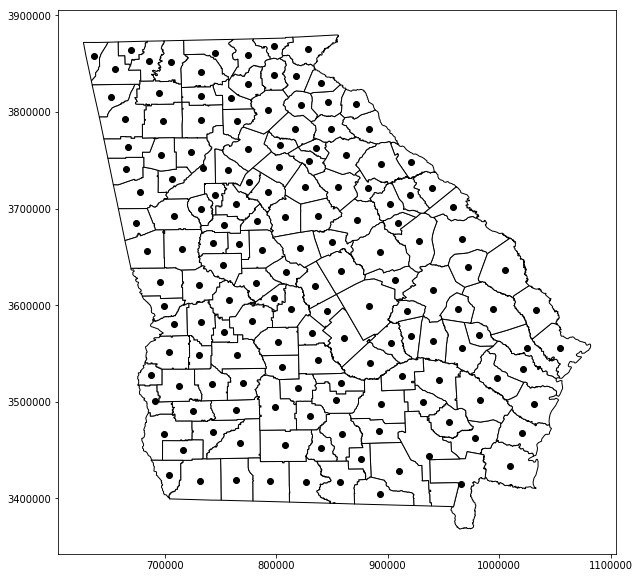

In [2]:
#Load Georgia dataset and generate plot of Georgia counties (figure 1)
georgia_data = pd.read_csv(ps.get_path('GData_utm.csv'))
georgia_shp = gp.read_file(ps.get_path('G_utm.shp'))
fig, ax = plt.subplots(figsize=(10,10))
georgia_shp.plot(ax=ax, **{'edgecolor':'black', 'facecolor':'white'})
georgia_shp.centroid.plot(ax=ax, c='black')

In [3]:
#Prepare Georgia dataset inputs
g_y = georgia_data['PctBach'].values.reshape((-1,1))
g_X = georgia_data[['PctFB', 'PctBlack', 'PctRural']].values
u = georgia_data['X']
v = georgia_data['Y']
g_coords = list(zip(u,v))

g_X = (g_X - g_X.mean(axis=0)) / g_X.std(axis=0)

g_y = g_y.reshape((-1,1))

g_y = (g_y - g_y.mean(axis=0)) / g_y.std(axis=0)

In [4]:
#Calibrate GWR model

gwr_selector = Sel_BW(g_coords, g_y, g_X)
gwr_bw = gwr_selector.search(bw_min=2)
print(gwr_bw)
gwr_results = GWR(g_coords, g_y, g_X, gwr_bw).fit()

117.0


In [6]:
gwr_results.params[0:5]

array([[-0.23204579,  0.22820815,  0.05697445, -0.42649461],
       [-0.2792238 ,  0.16511734,  0.09516542, -0.41226348],
       [-0.248944  ,  0.20466991,  0.07121197, -0.42573638],
       [-0.23036768,  0.1527493 ,  0.0510379 , -0.35938659],
       [ 0.19066196,  0.71627541, -0.16920186, -0.24091753]])

In [8]:
gwr_results.localR2[0:10]

array([[ 0.55932878],
       [ 0.5148705 ],
       [ 0.54751792],
       [ 0.50691577],
       [ 0.69062134],
       [ 0.69429812],
       [ 0.69813709],
       [ 0.70867337],
       [ 0.49985703],
       [ 0.49379842]])